In [24]:
import numpy as np
import pandas as pd
import random
from scipy import stats
import matplotlib.pyplot as plt

# 1) Carl the clumnsy waiter
Imagine a restaurant employs five dishwashers:

- Alice
- Bob
- Carl
- Dave
- Eric

One week, they break five dishes -- and Carl breaks four of the five. So, his coworkers have a hypothesis: Carl is clumsy!

Carl says no, it was just bad luck and random chance: it could have happened to anybody. We can call this the null hypothesis.

Can we do some math to help answer this argument? What's the probability it was just bad luck?

We can write a simulation to estimate the probability that Carl breaks at least four of the five dishes, assuming that breaking a dish is a truly random event. (We'll assume that the dishwashers have identical workloads and skills.)

In [3]:
# personnel
dishwashers = ['Alice', 'Bob', 'Carl', 'Dave', 'Eric']
dishwashers_len = len(dishwashers)

# probability of broken dish by dishwasher
prob_broken_dish = 1/dishwashers_len
print (f'{prob_broken_dish * 100}% per person of breaking a dish')

prob_broken_4_dish = prob_broken_dish / 4  
print (f'{prob_broken_4_dish * 100}% of Carl being THAT clumsy')

# for testing
days = 10000

20.0% per person of breaking a dish
5.0% of Carl being THAT clumsy


In [4]:
def test_o_truth (prob_broken_dish, dishwashers, days):
    """
                        ---What it does---
    Creates lists for the employees, those lists store the needed info. Then simulates the posibility of breaking up to 5 dishes per person with a random interval (0 to 5). Adds all elements of the lists and returns them. The number of days of test can be changed outside the function.

                        ---What it needs---
    List of the name of employees, the probability of dish-breaking (prob_broken_dish), number of days to test

                        ---What it returns---
    A df with the names of the employees and the total of disches smashed.
    """
    alice_d = []
    bob_d = []
    carl_d = []
    dave_d = []
    eric_d = []

    for e in range(days):
        broken_dish = random.randint(0,5)
        alice_d.append(broken_dish)
       
        broken_dish = random.randint(0,5)
        bob_d.append(broken_dish)

        broken_dish = random.randint(0,5)
        carl_d.append(broken_dish)

        broken_dish = random.randint(0,5)
        dave_d.append(broken_dish)

        broken_dish = random.randint(0,5)
        eric_d.append(broken_dish)

    total_alice = sum(alice_d)
    total_bob = sum(bob_d)
    total_carl = sum(carl_d)
    total_dave = sum(dave_d)
    total_eric = sum(eric_d)

    dishes_smashed = pd.DataFrame({'names': dishwashers, 'dishes_trashed': [total_alice, total_bob, total_carl, total_dave, total_eric]})
    return dishes_smashed

dishes_smashed = test_o_truth (prob_broken_dish, dishwashers, days)
dishes_smashed

,names,dishes_trashed
0,Alice,25106
1,Bob,24766
2,Carl,24963
3,Dave,24932
4,Eric,24772


In [5]:
total_dishes = dishes_smashed.dishes_trashed.sum()
total_dishes
for e in dishes_smashed.index:
    name = dishes_smashed.iloc[e,0]
    destroyed = dishes_smashed.iloc[e,1]
    probability = round(destroyed / total_dishes, 4)*100
    print (e, name, ": ", probability, '% of breaking a dish')

0 Alice :  20.16 % of breaking a dish
1 Bob :  19.89 % of breaking a dish
2 Carl :  20.04 % of breaking a dish
3 Dave :  20.02 % of breaking a dish
4 Eric :  19.89 % of breaking a dish


In [6]:
# Ta mal, hay que volver a hacerlo. No das lo que pide

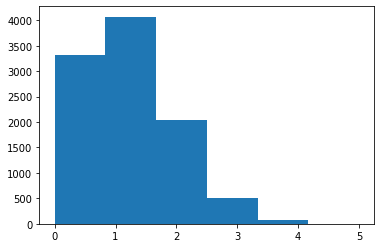

In [27]:
def simulacion(L):
  breakers = []
  for i in range(5):
    breakers.append(random.choice(L))
  return breakers.count('Carl')
tests = []
for i in range(10000):
  tests.append(simulacion(dishwashers))
plt.hist(tests, 6);

In [35]:
suma = 0
for i in tests:
    if i >=4:
        suma +=1

pvalue = suma/(len(tests))
zscore = (4-mean(tests))/stdev(tests)

print (pvalue, zscore)

TypeError: 'float' object is not callable

Answer: Carl is indeed clumsy. But not much more than any of his coleagues

# 2) Roll 2d6...

In [7]:
def roll_2d6 ():
    """Rolls 2d6 and returns the results"""
    roll1 =  random.randint(1, 6)
    roll2 = random.randint(1, 6)
    total = roll1 + roll2
    return total
def simulator (roll_2d6, rolls):
    """Simulates n number of rolls and returns the results"""
    
    results = []

    for e in range (rolls):
        results.append (roll_2d6())
    total_rolls = sum(results)
    return total_rolls, results

In [8]:
rolls = 100000
to_look_at = list(simulator(roll_2d6, rolls= rolls))

In [9]:
# mean
numbers = to_look_at[0]
mean = numbers / rolls
mean

7.00244

In [14]:
results

array([10,  4,  6, ...,  5, 10,  7])

In [10]:
# standard deviation
results = np.array(to_look_at[1])
std_dice = results.std()
std_dice

2.4182336624900413

In [20]:
zscore_dice = (10 - mean)/std_dice
zscore_dice

1.239565905683998